# Exploration liste des polluants - A. HAMIDOVIC Février 2024

Ce notebook a pour but d'explorer la liste des polluants retrouvés dans des prélèvements d'eau potable sur à des tests réalisés entre 2020 et 2024.

## 1. Import des tables depuis la BDD et visualisation des tables

In [1]:
# Import des librairies nécessaires pour l'analyse des données.

import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pipelines.tasks._common import DUCKDB_FILE

In [2]:
con = duckdb.connect(database=DUCKDB_FILE, read_only=True)

Pour diminuer le temps de traitement et ne pas saturer la mémoire, des dataframes comprenant les prélèvements et les résultats associés par année ont été chargés.

In [3]:
query_2024 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2024-01-01'
"""

df_2024 = con.sql(query_2024)
df_2024 = df_2024.df()
display(df_2024)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,rqana,cdunitereferencesiseeaux
0,00700204944,2024-12-17,CRESTET (LE),SAVEUR (QUALITATIF),2024,Aucun changement anormal,SANS OBJET
1,00700204944,2024-12-17,CRESTET (LE),SULFATES,2024,"7,7",mg/L
2,00700204944,2024-12-17,CRESTET (LE),ENTÉROCOQUES /100ML-MS,2024,<1,n/(100mL)
3,00700204944,2024-12-17,CRESTET (LE),TITRE ALCALIMÉTRIQUE,2024,"0,00",°f
4,00700204944,2024-12-17,CRESTET (LE),TITRE ALCALIMÉTRIQUE COMPLET,2024,"0,95",°f
...,...,...,...,...,...,...,...
18774082,97400137504,2024-04-19,TAMPON (LE),ENTÉROCOQUES /100ML-MS,2024,<1,n/(100mL)
18774083,97400137504,2024-04-19,TAMPON (LE),TITRE ALCALIMÉTRIQUE,2024,"<2,0",°f
18774084,97400137504,2024-04-19,TAMPON (LE),TEMPÉRATURE DE L'EAU (DOM),2024,"23,2",°C
18774085,97400137504,2024-04-19,TAMPON (LE),TEMPÉRATURE DE MESURE DU PH,2024,"22,8",°C


In [4]:
query_2023 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2023-01-01' and dateprel < '2024-01-01'
"""

df_2023 = con.sql(query_2023)
df_2023 = df_2023.df()
display(df_2023)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,rqana,cdunitereferencesiseeaux
0,00200196769,2023-10-25,SERGY,IMAZAMÉTHABENZ-MÉTHYL,2023,"<0,010",µg/L
1,00200196769,2023-10-25,SERGY,IMAZALILE,2023,"<0,005",µg/L
2,00200196769,2023-10-25,SERGY,IMIBENCONAZOLE,2023,"<0,005",µg/L
3,00200196769,2023-10-25,SERGY,METSULFURON MÉTHYL,2023,"<0,020",µg/L
4,00200196769,2023-10-25,SERGY,IMIDACLOPRIDE,2023,"<0,005",µg/L
...,...,...,...,...,...,...,...
19489759,09500174062,2023-05-11,BEAUMONT-SUR-OISE,PH,2023,"7,6",unité pH
19489760,09500174062,2023-05-11,BEAUMONT-SUR-OISE,SAVEUR (QUALITATIF),2023,Aucun changement anormal,SANS OBJET
19489761,09500174062,2023-05-11,BEAUMONT-SUR-OISE,ENTÉROCOQUES /100ML-MS,2023,0,n/(100mL)
19489762,09500174062,2023-05-11,BEAUMONT-SUR-OISE,TEMPÉRATURE DE L'EAU,2023,"13,7",°C


In [5]:
query_2022 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2022-01-01' and dateprel < '2023-01-01'
"""

df_2022 = con.sql(query_2022)
df_2022 = df_2022.df()
display(df_2022)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,rqana,cdunitereferencesiseeaux
0,00600240199,2022-09-12,PEONE,METHOXYFENOSIDE,2022,"<0,050",µg/L
1,00600240199,2022-09-12,PEONE,MÉTAMITRONE,2022,"<0,005",µg/L
2,00600240199,2022-09-12,PEONE,MÉTHOMYL,2022,"<0,005",µg/L
3,00600240199,2022-09-12,PEONE,ESA METAZACHLORE,2022,"<0,020",µg/L
4,00600240199,2022-09-12,PEONE,OXA METAZACHLORE,2022,"<0,020",µg/L
...,...,...,...,...,...,...,...
20100814,09400161332,2022-11-28,MANDRES-LES-ROSES,ENTÉROCOQUES /100ML-MS,2022,<1,n/(100mL)
20100815,09400161332,2022-11-28,MANDRES-LES-ROSES,TITRE ALCALIMÉTRIQUE COMPLET,2022,"24,05",°f
20100816,09400161332,2022-11-28,MANDRES-LES-ROSES,TEMPÉRATURE DE L'EAU,2022,"12,1",°C
20100817,09400161332,2022-11-28,MANDRES-LES-ROSES,TITRE HYDROTIMÉTRIQUE,2022,"34,58",°f


In [6]:
query_2021 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2021-01-01' and dateprel < '2022-01-01'
"""

df_2021 = con.sql(query_2021)
df_2021 = df_2021.df()
display(df_2021)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,rqana,cdunitereferencesiseeaux
0,00600225454,2021-05-04,VILLENEUVE-LOUBET,TURBIDITÉ NÉPHÉLOMÉTRIQUE NFU,2021,"0,16",NFU
1,00600225455,2021-05-04,OPIO,ASPECT (QUALITATIF),2021,Aspect normal,SANS OBJET
2,00600225455,2021-05-04,OPIO,CONDUCTIVITÉ À 25°C,2021,363,µS/cm
3,00600225455,2021-05-04,OPIO,CHLORE LIBRE,2021,"0,44",mg(Cl2)/L
4,00600225455,2021-05-04,OPIO,CHLORE TOTAL,2021,"0,46",mg(Cl2)/L
...,...,...,...,...,...,...,...
20121152,97400123081,2021-07-15,TAMPON (LE),SAVEUR (QUALITATIF),2021,Aucun changement anormal,SANS OBJET
20121153,97400123081,2021-07-15,TAMPON (LE),ENTÉROCOQUES /100ML-MS,2021,<1,n/(100mL)
20121154,97400123081,2021-07-15,TAMPON (LE),TEMPÉRATURE DE L'EAU (DOM),2021,"17,0",°C
20121155,97400123081,2021-07-15,TAMPON (LE),TEMPÉRATURE DE MESURE DU PH,2021,"17,0",°C


In [7]:
query_2020 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2020-01-01' and dateprel < '2021-01-01'
"""

df_2020 = con.sql(query_2020)
df_2020 = df_2020.df()
display(df_2020)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,rqana,cdunitereferencesiseeaux
0,00600220304,2020-08-03,CONTES,TRIADIMENOL,2020,"<0,005",µg/L
1,00600220304,2020-08-03,CONTES,TEMPÉRATURE DE L'EAU,2020,"16,8",°C
2,00600220304,2020-08-03,CONTES,SULFOTEPP,2020,"<0,005",µg/L
3,00600220304,2020-08-03,CONTES,TERBUPHOS,2020,"<0,005",µg/L
4,00600220304,2020-08-03,CONTES,TERBUMÉTON,2020,"<0,005",µg/L
...,...,...,...,...,...,...,...
18994003,09100176784,2020-09-17,MORSANG-SUR-SEINE,ENTÉROCOQUES /100ML-MS,2020,<1,n/(100mL)
18994004,09100176784,2020-09-17,MORSANG-SUR-SEINE,TITRE ALCALIMÉTRIQUE COMPLET,2020,"15,00",°f
18994005,09100176784,2020-09-17,MORSANG-SUR-SEINE,TEMPÉRATURE DE L'EAU,2020,"22,1",°C
18994006,09100176784,2020-09-17,MORSANG-SUR-SEINE,TITRE HYDROTIMÉTRIQUE,2020,"18,96",°f


## 2. Visualisations générales

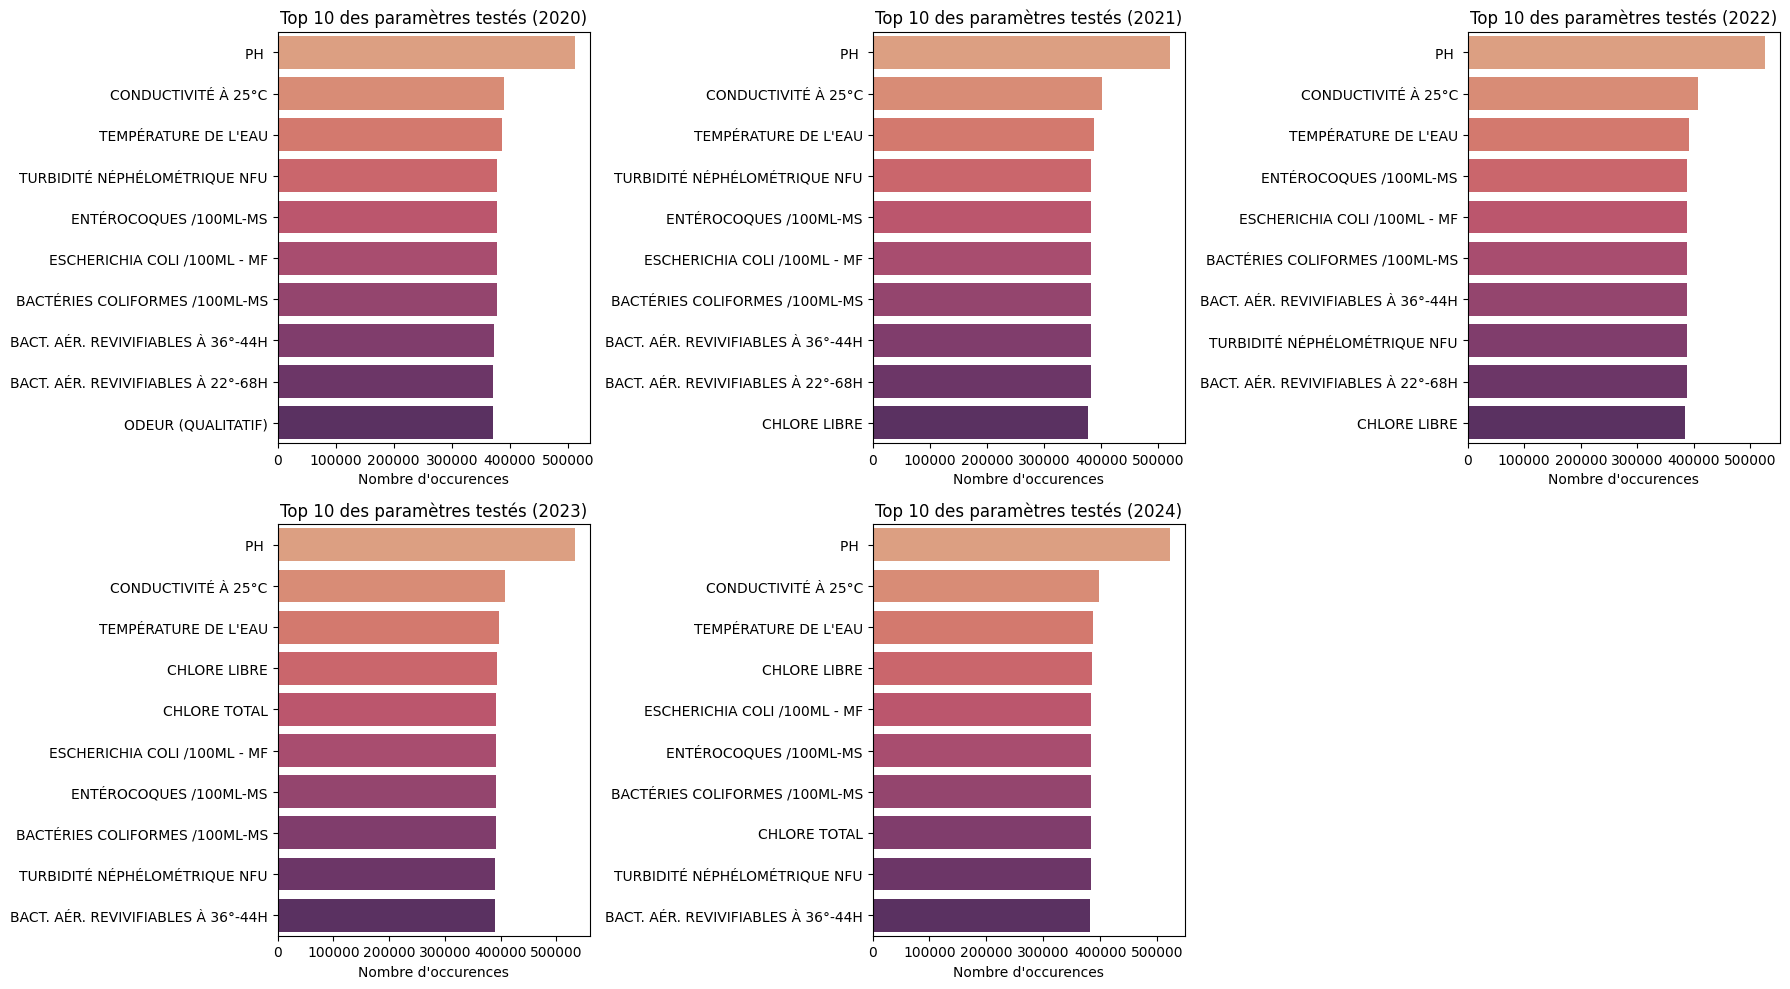

In [8]:
# Top 10 des paramètres testés les plus fréquents par année

dataframes = [df_2020, df_2021, df_2022, df_2023, df_2024]
annees = ["2020", "2021", "2022", "2023", "2024"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (df, annee) in enumerate(zip(dataframes, annees)):
    frequence_test = df["libmajparametre"].value_counts()

    sns.barplot(
        x=frequence_test.values[:10],
        y=frequence_test.index[:10],
        hue=frequence_test.index[:10],
        palette="flare",
        ax=axes[i],
    )
    axes[i].set_title(f"Top 10 des paramètres testés ({annee})")
    axes[i].set_xlabel("Nombre d'occurences")
    axes[i].set_ylabel("")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [9]:
# Catégorisation
mapping_categories = pd.read_csv(
    "https://s3.fr-par.scw.cloud/pollution-eau-s3/upload/mapping_categories.csv"
)
display(mapping_categories)

,cdparametresiseeaux,cdparametre,libmajparametre,libminparametre,casparam,categorie
0,PESTOT,6276.0,TOTAL DES PESTICIDES ANALYSÉS,Total des pesticides analysés,NaN,pesticides
1,ATRZ,1107.0,ATRAZINE,Atrazine,1912-24-9,pesticides
2,SMZ,1263.0,SIMAZINE,Simazine,122-34-9,pesticides
3,MTC,1221.0,MÉTOLACHLORE,Métolachlore,51218-45-2,pesticides
4,TBZ,1268.0,TERBUTHYLAZIN,Terbuthylazin,5915-41-3,pesticides
...,...,...,...,...,...,...
824,SPFAS,8847.0,SOMME DE 20 PFAS,Somme de 20 substances perfluoroalkylées (PFAS),NaN,pfas
825,PFHPA,5977.0,ACIDE PERFLUOROHEPTANOÏQUE,Acide perfluoroheptanoïque,375-85-9,pfas
826,PFOS,6561.0,ACIDE SULFONIQUE DE PERFLUOROOCTANE,Acide sulfonique de perfluorooctane,1763-23-1,pfas
827,ASPFOS,6560.0,ACIDE PERFLUOROOCTANE SULFONIQUE,Acide perfluorooctane sulfonique (PFOS),1763-23-1,pfas


### 2.1. Focus sur 2024

In [10]:
resultats_table_2024 = df_2024.merge(
    mapping_categories[["libmajparametre", "categorie"]],
    on="libmajparametre",
    how="left",
)

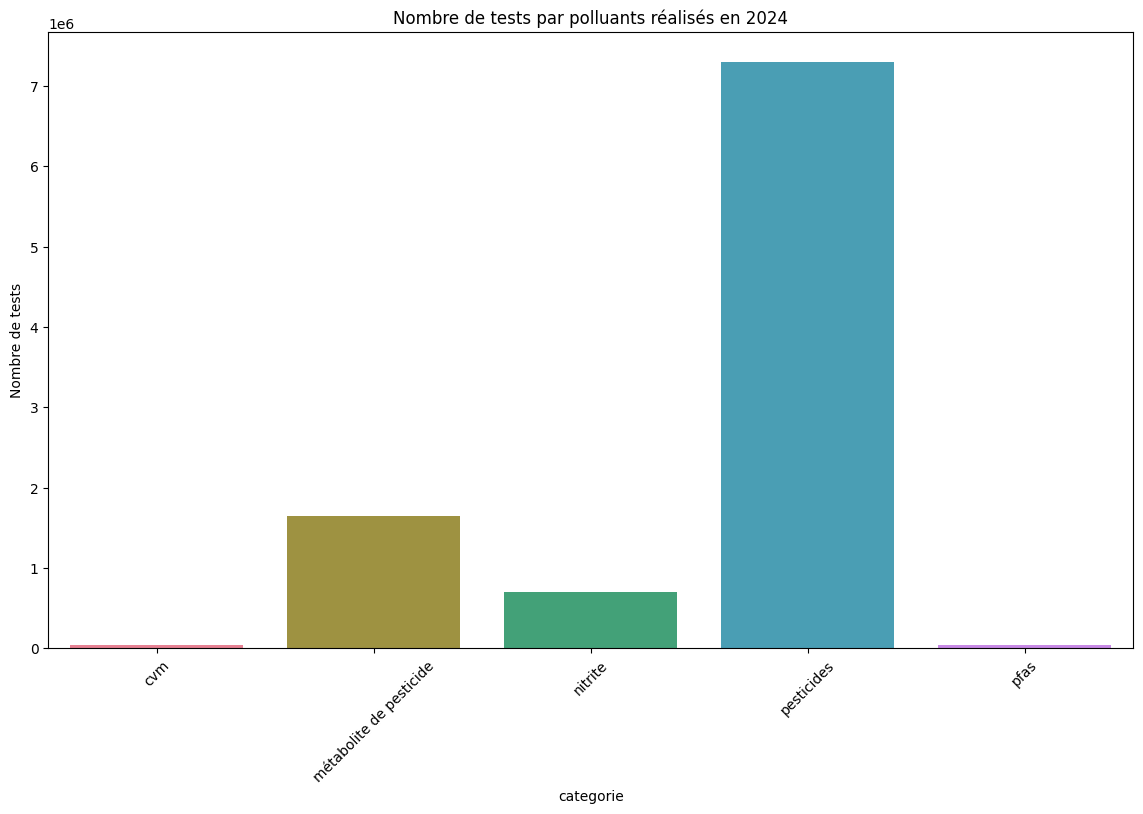

In [11]:
# Visualisation des polluants chimiques testés en fonction de l'année
count_tests = (
    resultats_table_2024.groupby("categorie").size().reset_index(name="nb_tests")
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=count_tests, x="categorie", y="nb_tests", hue="categorie", palette="husl"
)
plt.title("Nombre de tests par polluants réalisés en 2024")
plt.ylabel("Nombre de tests")
plt.xticks(rotation=45)
plt.show()

### 2.2. Focus sur 2020

In [13]:
resultats_table_2020 = df_2020.merge(
    mapping_categories[["libmajparametre", "categorie"]],
    on="libmajparametre",
    how="left",
)

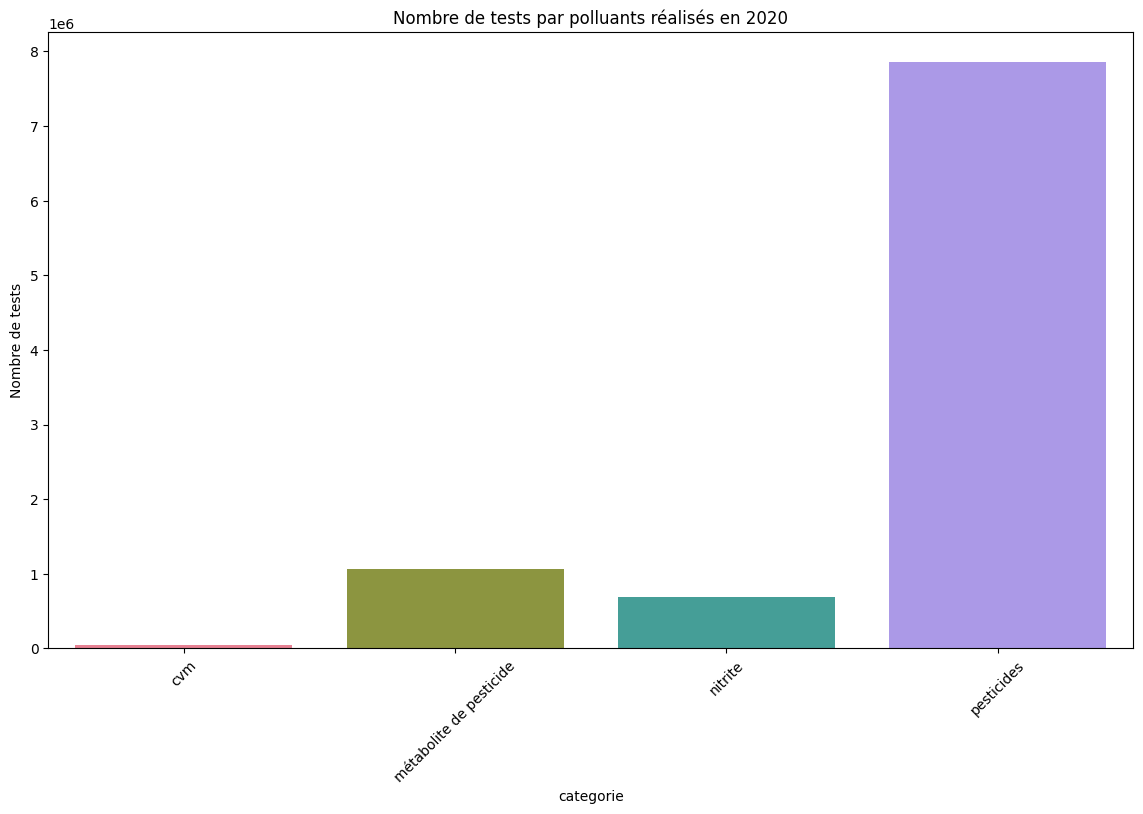

In [14]:
# Visualisation des polluants chimiques testés en fonction de l'année
count_tests_2020 = (
    resultats_table_2020.groupby("categorie").size().reset_index(name="nb_tests")
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=count_tests_2020, x="categorie", y="nb_tests", hue="categorie", palette="husl"
)
plt.title("Nombre de tests par polluants réalisés en 2020")
plt.ylabel("Nombre de tests")
plt.xticks(rotation=45)
plt.show()